In [ ]:
from configparser import ConfigParser

config = ConfigParser()
config.read('config.ini')
config['model']['save_model_checkpoint']


In [ ]:
import matplotlib.pyplot as plt
import IPython.display as ipd

plt.plot(wav)
ipd.Audio(wav, rate=44100)

In [ ]:
import pyaudio
import wave
# from torchaudio.io import StreamReader

CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 8000
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "output.wav"

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    print(data)
    frames.append(data)

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()


In [6]:
import Augmentation
import torch
from AudioDataset import transformData
from torch.utils.data import Dataset
import audiomentations
import torchaudio

audio_paths = Augmentation.getAudioPaths('./data/')

# audio_paths += Augmentation.getAudio(
#     'E:/Processed Singapore Speech Corpus/ENV')[0:1000]

transformList = [
    {
        "before_cochannel": [audiomentations.Gain(),
        audiomentations.TimeStretch(min_rate=0.8,
                                        max_rate=1.2,
                                        p=0.5,
                                        leave_length_unchanged=False),],
        "audio": [
            
            audiomentations.AddGaussianNoise(min_amplitude=0.001,
                                             max_amplitude=0.025,
                                             p=0.5),
            audiomentations.PitchShift(min_semitones=-4,
                                       max_semitones=4,
                                       p=0.5),
            audiomentations.Shift(min_fraction=-0.5,
                                  max_fraction=0.5,
                                  p=0.5),
        ],
    },
    {
        "spectrogram": [
            torchaudio.transforms.TimeMasking(80),
            torchaudio.transforms.FrequencyMasking(80)
        ],
    },
]

audio_train_dataset = transformData(audio_paths, transformParams = transformList, generateCochannel = True)


test_dataloader = torch.utils.data.DataLoader(
    audio_train_dataset,
    batch_size=64,
    num_workers=0,
    shuffle=True,
)
   

batch = next(iter(test_dataloader))
batch

[tensor([[[[  2.2682,   2.5052,   2.5762,  ...,   2.7400,   2.6046,   2.6552],
           [  0.0454,   0.5225,   0.5857,  ...,   0.6980,   0.4670,   0.5779],
           [ -6.0181,  -8.9828,  -7.9143,  ...,  -9.1057,  -6.8677,  -6.8281],
           ...,
           [-12.6317,  -6.2302,  -8.0073,  ...,  -7.1630,  -9.8091, -10.0929],
           [ -6.8565,  -7.5624,  -7.1307,  ...,  -5.0130,  -8.5571,  -8.5140],
           [ -6.3396,  -8.1780,  -8.7825,  ...,  -4.8965,  -9.5169,  -8.7825]]],
 
 
         [[[  2.6083,   2.7440,   2.6551,  ...,   2.5596,   2.5745,   2.7670],
           [  0.6708,   0.8762,   0.6125,  ...,   0.5090,   0.5451,   0.9119],
           [-10.3556,  -5.4298,  -9.6843,  ...,  -8.7388,  -9.1245,  -9.3037],
           ...,
           [ -8.0932, -11.2070,  -7.0819,  ...,  -8.1009,  -7.4598, -13.0038],
           [-15.6629, -13.0475,  -7.9979,  ...,  -5.7717,  -5.6661,  -7.4883],
           [ -9.8226, -12.3287,  -7.4182,  ...,  -6.6167,  -5.5221,  -6.5342]]],
 
 
        

1


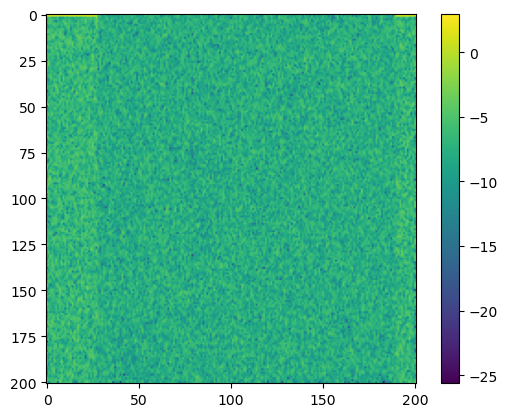

In [15]:
import matplotlib.pyplot as plt


batch = next(iter(test_dataloader))

print(batch[1][0].item())
plt.imshow(batch[0][0][0])
plt.colorbar()
plt.show()


